# The Gaussian Plume model

#### Maarten Krol (Version 1.0, April, 2020)

The Gaussian Plume model (GPM) is a widely used tool in air pollution applications. 
Basically, the model is used to estimate the downwind air pollution concentrations, given information about the pollutant emissions and the nature of the atmosphere. GPMs form the basis for permits that are granted to large facilities to emit "smelly" or toxic compounds. But GPMs also form the basis of the Dutch model OPS that calculates Nitrogen deposition on nature areas.

Everybody knows plumes from stacks or fires. An example from a large industrial explosion is given in Figure 1.

<figure>
  <img src="Breda.png", width="400" height="300">
  <figcaption> <i>Figure 1: A plume from an industrial explosion in Breda 2014</i></figcaption>
</figure>


As can be seen in Figure 1, the dispersion of pollutants is strongly influenced by turbulence in the boundary layer. The goal of this practical is to better understand the GPM. Specifically we will:
* Explain the mathematical formulation of the GPM
* Investigate the influence of wind, source strength, and stack height
* Determine concentrations downwind of a stack
* Investigate the influence of the atmospheric stability
* Extend the GPM with terms for ground reflection and line sources

### The basis of the GPM

The GPM can be derived from the advection diffusion equation of a tracer. The basic concept is that concentrations downwind of a source spread laterally and vertically by turbulent motions in the atmospheric boundary layer. In a convective boundary, plumes will normally exhibit irregular behaviour, because of the strong turbulence and the large eddies that move the plume around. This can be observed in the movie below, which show results from a simulation of a plume in a slightly convective boundary layer (This is called a Large Eddy Simulation, courtesy: Chiel van Heerwaarden, MAQ). We look at the plume from above!

<video controls src="movie_int.mp4" />




It is clear that we have to average over a certain time to get the stationary solution that forms the basis of the GPM. Typically, we need to average over at least 30 minutes. This also implies that if you measure the concentration downwind of a source, a single measurement does not always provide a reliable answer!
The Gaussian plume model thus represents an **average situation**.


### The Guass Distribution

The (stationary) concentration distribution downwind of a plume is assumed to be Gaussian. 
Mathematically this distribution is described by:

$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}}{\rm exp}(-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2)$$

where $\mu$ is the mean value, and $\sigma$ the standard deviation. The Gaussian curve is a so-called probability density function, also called the **normal distribution**. 
The Gaussian distribution is normalized (by $\frac{1}{\sigma \sqrt{2\pi}}$) such that the sum over all values of x gives a probability of 1. 

To investigate the curve a bit more in detail, you can plot the Gaussian dsitribution by selecting the call below (it will be highlighted) and press **Shift-Enter** simultaneously.

Area under the curve:   1.00


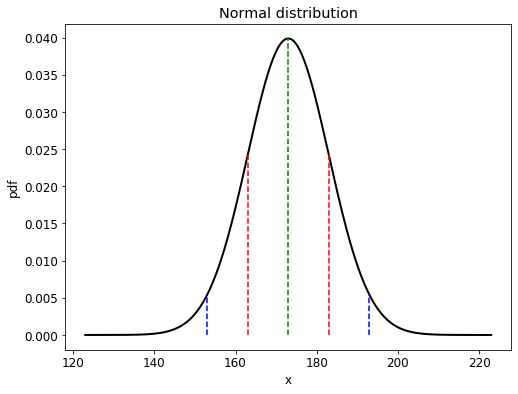

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
mu = 173.0
sigma = 10.0
plt.matplotlib.rcParams.update({'font.size': 12})
x, step = np.linspace(mu-5*sigma,mu+5*sigma,num=1000,retstep=True)
norm = 1./(sigma*np.sqrt(np.pi*2))
s1 = np.exp(-0.5*(1.0)**2)
s2 = np.exp(-0.5*(2.0)**2)
gauss = norm*np.exp(-0.5*((x-mu)/sigma)**2)
fig,ax = plt.subplots(1,figsize=(8,6))

ax.plot(x,gauss,'k',lw=2)
ax.plot([mu,mu],[0.0,norm],'g--' )
ax.plot([mu+sigma,mu+sigma],[0,norm*s1],'r--')
ax.plot([mu-sigma,mu-sigma],[0,norm*s1],'r--')
ax.plot([mu+2*sigma,mu+2*sigma],[0,norm*s2],'b--')
ax.plot([mu-2*sigma,mu-2*sigma],[0,norm*s2],'b--')
ax.set_ylabel('pdf')
ax.set_title('Normal distribution')
ax.set_xlabel('x')
print("Area under the curve: %6.2f"%(gauss.sum()*step))

The black line is the Gaussian distribution. The green dotted line indicates the **mean** of the distribution. You can think of $x$ as the average length of a Wageningen student (173 cm). The red and blue lines represent deviations from the mean by one and two standard deviations ($\sigma$), respectively. The probablility to find a value of *x* between the red lines is 68%. The corresponding probability for 2$\sigma$ (blue lines) is 95%. The probability to find $x$ outside the blue lines is only 5%. And of course the total area under the curve is 1 (100%).

> ***Tasks***
> * Change the mean and standard deviation in the pogram above and replot the curve (**Shift-Enter**)
> * How and where in the program is the area under the curve calculated?



The GPM model assumes that the concentration distributions (in the vertical and crosswind directions), downwind of a point emission source have a Gaussian dsitribution. So lets look at the GPM.

### The Gaussian Plume formula

Now we will use the Gaussian function in the plume model. We consider the coordinate system as shown in Figure 2.


<figure>
  <img src="Coordinate.png", width="400" height="300">
  <figcaption> <i>Figure 2: Coordination system of a Gaussian plume model</i></figcaption>
</figure>

The source enters the atmosphere at height $H_e$ (stack heigh plus plume rise). The stack is located at location $x=0$ and $y=0$. The wind $u$ blows in the $+x$ direction. As you can see, the plume-spread in the $y$ and $z$ directions is described by Gaussian concentration profiles. Further characteristics of the Gaussian Plume are:

* Depending on the atmospheric stability, $\sigma_y$ and $\sigma_z$ can have different values.
* The parameters $\sigma_y$ and $\sigma_z$ depend on $x$: the further downwind, the wider the Gaussian dsitribution.
* Because the Gaussian curve in normalized to 1, mass in the plume is conserved.

The latter property implies that in each $yz$-cross-section along the $+x$ direction, the same amount of plume exhaust passes and that the following relation holds: $$ \int_y \int_z C\ u\ dy\ dz = Q $$
Here $Q$ is the source strength (in kg/s) $C$ is the atmospheric concentration (in kg/m$^3$) and $u$ is the windspeed (in m/s). Note that the variable $u$ is assumed to be constant over the domain and could have been placed before the integral. 

The Gaussian plume formula reads:
$$ C(x,y,z) = \frac{Q}{2\pi\sigma_y\sigma_zu}{\rm exp}\left(-\frac{y^2}{2\sigma_y^2}\right)
{\rm exp}\left(-\frac{(z-H)^2}{2\sigma_z^2}\right)$$

You can verify that the atmospheric concentration $C$ at location $x, y, z$ 
is a function of the source strength (Q), effective stack height ($H$), wind (u), $y$, $z$, $\sigma_y$, and $\sigma_z$. As we saw in Figure 2, these latter two $\sigma$ values depend on $x$. The relation between $\sigma$ and $x$ depends on the stability of the atmosphere, which will be discussed next. 

> ***Task***
> * Verify the units of the two equations above.



### Influence of the atmospheric stability

The static stability of the atmosphere strongly determines the dispersion of air polutants. In a unstable boundary layer, plumes are constantly moved up and down by rising and sinking motions. In contrast, mixing is strongly reduced in a stable boundary layer (e.g. at night, with low winds). Figure 3 shows how plumes can behave as a function of the temperature profile in the lower atmosphere. Looping, coning, and fanning occur during respectively unstable, neautral, and stable conditions. Note that the lower three panels exhibit temperature jumps near the top of the boundary layer. Remember also that stacks are often build to release (dangerous or smelly) air pollutants at higher altitudes!

<figure>
  <img src="Stability.png", width="400" height="300">
  <figcaption> <i>Figure 3: Plumes from a strack under different stabilities of the atmosphere. The adiabatic temperature is indicated by the dashed line, and the true profile by the solid line.</i></figcaption>
</figure>

Much research has been devoted to establish relations between the parameters $\sigma_y$ and $\sigma_z$ and the atmospheric stability. In general, relations take the form:
$$\sigma_y = Fx^f$$
$$\sigma_z = Gx^g$$


In this formula, the parameters $F$, $G$, $f$ and $g$ depend on the stability. Today we will use parameters that are listed in Table 1.
  
<table>
  <caption>Table 1: Gaussian plume dispersion parameters for different atmospheric stability classes.</caption>
<tr>
<th>Stabiliy</th>
<th>F</th>
<th>f</th>
<th>G</th>
<th>g</th>   
</tr>
<tr>
<td>Stable</td>
<td>0.31</td>
<td>0.71</td>
<td>0.06</td>
<td>0.71</td>
</tr>
<tr>
<td>Neutral</td>
<td>0.32</td>
<td>0.78</td>
<td>0.22</td>
<td>0.78</td>
</tr>
<tr>
<td>Unstable</td>
<td>0.40</td>
<td>0.91</td>
<td>0.41</td>
<td>0.91</td>
</tr>
</table>

> ***Task***
> * Calculate $\sigma_y$ and $\sigma_z$ at $x=1000$m for all three stability classes
> * What is the unit of $\sigma$?
> * Are these values physcially realistic?

### Applying the Gaussian Plume Model

The following cell contains a program to run the Guassian Plume model. It can be fully operated with sliders and drop down menus. You can set the main parameters of the GPM and determine the concentration in a receptor point (i.e. a house downwind of a stack). Moreover, $yz$, $xz$, and $xy$ concentration cross-sections will be plotted. 
> Activate the program by selecting the cell below and press **Shift-Enter**
> 
> ***Tasks***
> * Write down the concentration in the receptor point $x,y,z = 3000,0,50$ m
> * Verify the cross-section plots. Does the concentration value match?
> * Based on the GPM formula:
> > What will happen to the concentration when you double the wind-speed?
> > 
> > And when you double the source strength?
> * Perform an experiment to validate your answer
> * The term $\int_y\int_z C\ u\ dy\ dz$ is printed. Is the value equal to the source strength?  (Answer will be covered in the next section)
>
> * Write down the value of dispersion parameters $\sigma_y$ and $\sigma_z$.
> > Change the Stability first to "neutral" and then to "stable"
> * What happens to the concentration in the receptor point? 
> * How does the plume shape change?
> * What happens to $\sigma_y$ and $\sigma_z$?
> * In a stable atmosphere, what should be the height of the stack to bring the surface concentration ($z = 0$) at $x = 3000$ m below 1 $\mu$g/m$^3$? Use $Q$ = 200 kg/s and $u$ = 5 m/s.


In [2]:
%matplotlib inline
from plot_gauss import *
pg = plot_gauss(1)

Box(children=(Box(children=(Label(value='Q : Strength of the source'), IntSlider(value=200, description=':', m…

Box(children=(Box(children=(Dropdown(description='Plume type', layout=Layout(visibility='hidden'), options=('p…

interactive(children=(ToggleButton(value=False, description='Calculate'), Output()), _dom_classes=('widget-int…

### Plume reflection
In the previous assignment, we sometimes "missed" part of the emitted material. This happens when the plume hits the Earth surface. The mathematical formulations does not "know" about the ground and simply extends the plume below the surface. There is the missing material!
Only if the emitted compound is very reactive to the Earth surface (e.g. by efficient uptake), this might be a good approximation. However, mathematically it is easy to reflect the plume at the surface, as is illustrated in Figure 4.
<figure>
  <img src="Reflection.jpg", width="600" height="400">
  <figcaption> <i>Figure 4: Concept of a plume reflecting at the surface.</i></figcaption>
</figure>

 
This "reflection term" can be easily added to the formula:
$$ C(x,y,z) = \frac{Q}{2\pi\sigma_y\sigma_zu}{\rm exp}\left(-\frac{y^2}{2\sigma_y^2}\right)
\left( {\rm exp}\left(-\frac{(z-H)^2}{2\sigma_z^2}\right) +
{\rm exp}\left(-\frac{(z+H)^2}{2\sigma_z^2}\right)\right)
$$

As you can verify, an extra Gaussian term is added in the $z$-direction. In the following program, this plume reflection has been activated.
> Activate the program by selecting the cell followed by **Shift-Enter**
> 
> ***Tasks***
>
> * Verify that the intregral $\int_y\int_z C\ u\ dy\ dz$ equals the source strength $Q$.
> * A stack with a height of 90 m emits 5 kg CO$_2$ per second. The wind speed is 8 m/s. 
>  * What is the  concentration enhancement at $x,y,z = 1000, 10, 90$ m in unstable, neutral, and stable atmospheric conditions?
>  * What is the  concentration enhancement at $x,y,z = 1000, 300, 0$ m in unstable, neutral, and stable atmospheric conditions?
> * Explain the differences.





In [3]:
%matplotlib inline
from plot_gauss import *
pg = plot_gauss(2)

Box(children=(Box(children=(Label(value='Q : Strength of the source'), IntSlider(value=200, description=':', m…

Box(children=(Box(children=(Dropdown(description='Plume type', index=1, options=('point', 'point+reflection', …

interactive(children=(ToggleButton(value=False, description='Calculate'), Output()), _dom_classes=('widget-int…

### The line source
The final extension we make is to consider a line source. Important line source for policy applications are highways. In the line source model the unit of emission changes to kg/(ms): the emission of pollutants (e.g. NO) per second and **per m highway**. This emission can be deduced from the traffic density. The line source is placed along the $y$-axis. As a result, dispersion in the y-direction disappears from the Gaussan plume model:
$$ C(x,y,z) = \frac{Q}{\sqrt{2\pi}\sigma_zu}
\left( {\rm exp}\left(-\frac{(z-H)^2}{2\sigma_z^2}\right) +
{\rm exp}\left(-\frac{(z+H)^2}{2\sigma_z^2}\right)\right)
$$
Note that surface reflection is still activated. In the following program, you can work with a line source. We will consider receptor points that are located downwind of a highway. Advanced options have been activated that allow for adapting the calculation grid.

> Activate the program by selecting the cell followed by **Shift-Enter**
> 
> ***Tasks***
>
> * Verify the units of the line source model and check if the intregral $\int_z C\ u\ dz$ equals the source strength $Q$.
> * How does the concentration at $x,z=1000,2$ depend on the atmospheric stability?


In [4]:
%matplotlib inline
from plot_gauss import *
pg = plot_gauss(3)

Box(children=(Box(children=(Label(value='Q : Strength of the source'), IntSlider(value=1, description=':', max…

Box(children=(Box(children=(Dropdown(description='Plume type', index=2, options=('point', 'point+reflection', …

interactive(children=(ToggleButton(value=False, description='Calculate'), Output()), _dom_classes=('widget-int…

### Extra: CO$_2$ vertical profiles at Cabauw
The measurement tower at Cabauw is located 10560 m to the South-West of the highway A2. See Figure 5.
The highway emits 1 kg CO$_2$ per second per m highway. Do to turbulence generated by traffic, we assume an effective emission height of 5 m.

<figure>
  <img src="Cabauw.png", width="600" height="400">
  <figcaption> <i>Figure 5: From Google Maps: the location of Cabauw with respect to the A2.</i></figcaption>
</figure>


The wind from the NE (5 m/s) blows straigt from the highway to Cabauw. At Cabauw, the CO$_2$ concentration is monitored at 10, 40, 80, 140, and 200 m along the tower.

> ***Task***
>
> * Based on experiements with the line source model, sketch expected CO$_2$ concentration profiles along the Cabauw tower for unstable, neutral, and stable conditions.

